

<h1><center>Digit Recognizer</center></h1>


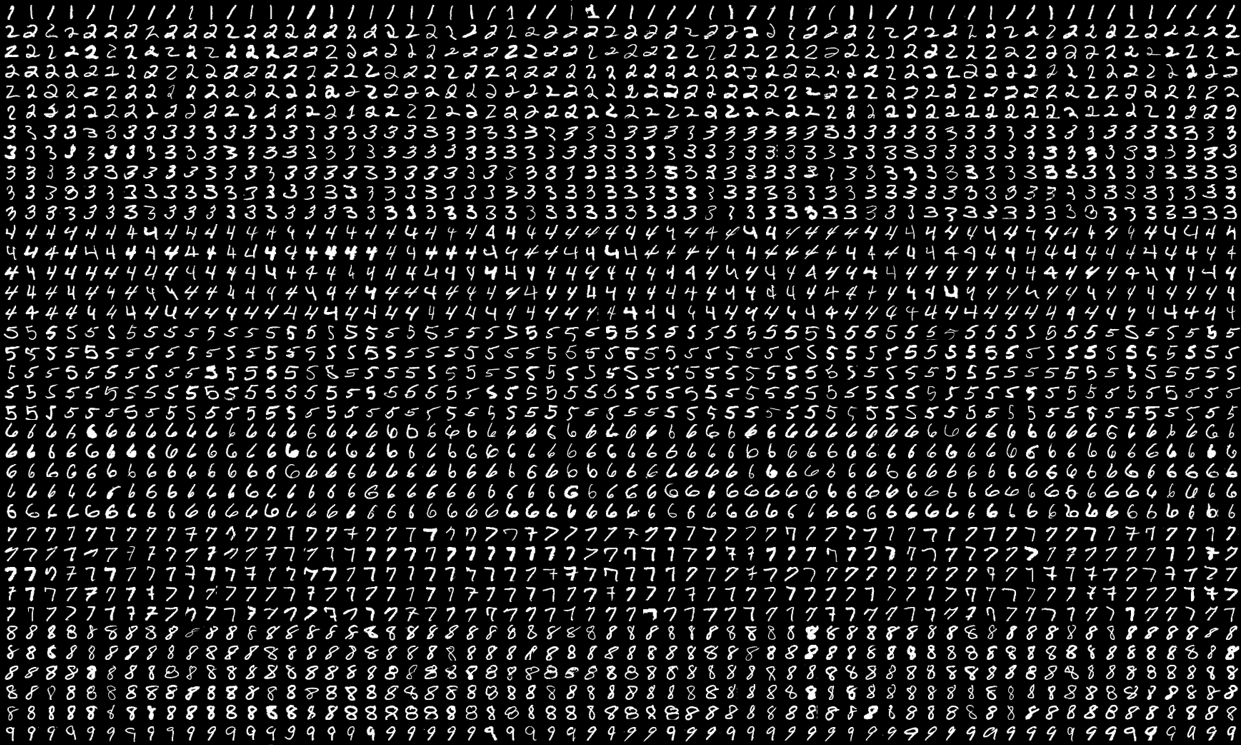

In [1]:
## import needed packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
## Load data

(trainX, trainY), (testX, testY) = mnist.load_data()

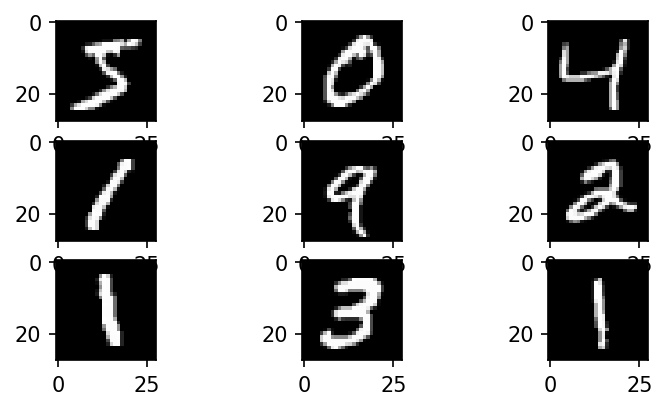

In [3]:
## to show data set
plt.figure(figsize=(6, 3), dpi=150)

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [4]:
# reshape dataset to have a single channel


trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
## one hot encode target values


trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [6]:
# convert from integers to floats


trainX = trainX.astype('float32')
testX = testX.astype('float32')

In [7]:
# normalize to range 0-1


trainX = trainX / 255.0
testX = testX / 255.0

In [8]:
## define model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [9]:
# compile model


opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#fit model


history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY))

_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1630 - accuracy: 0.9500 - val_loss: 0.0686 - val_accuracy: 0.9777
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0499 - val_accuracy: 0.9836
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0436 - val_accuracy: 0.9862
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0454 - val_accuracy: 0.9854
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.0417 - val_accuracy: 0.9855
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0388 - val_accurac

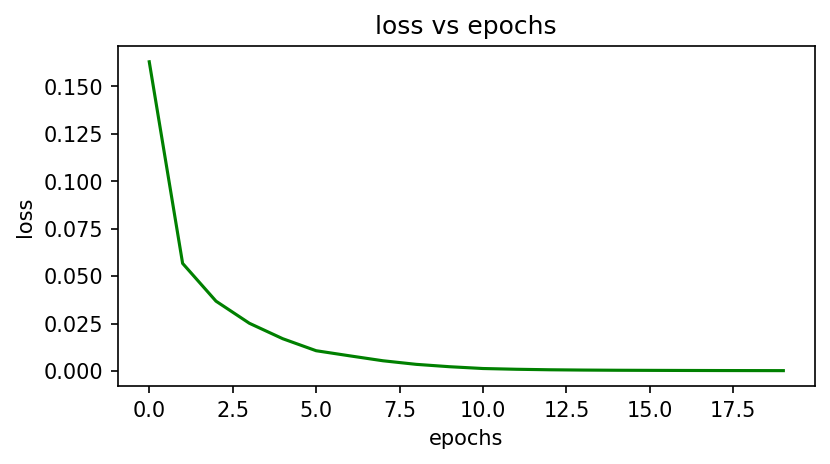

In [11]:
# graph of loss function 


plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history.history['loss'],'g')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.show()

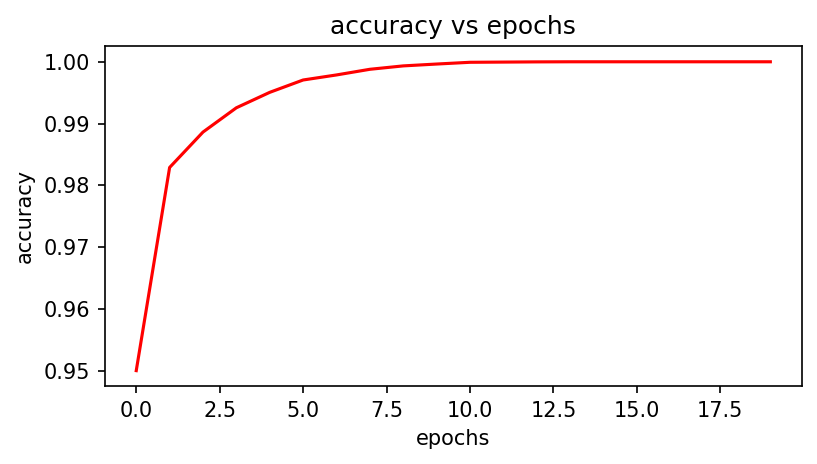

In [12]:
# graph of accuracy score

plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history.history['accuracy'],'r')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy vs epochs")
plt.show()

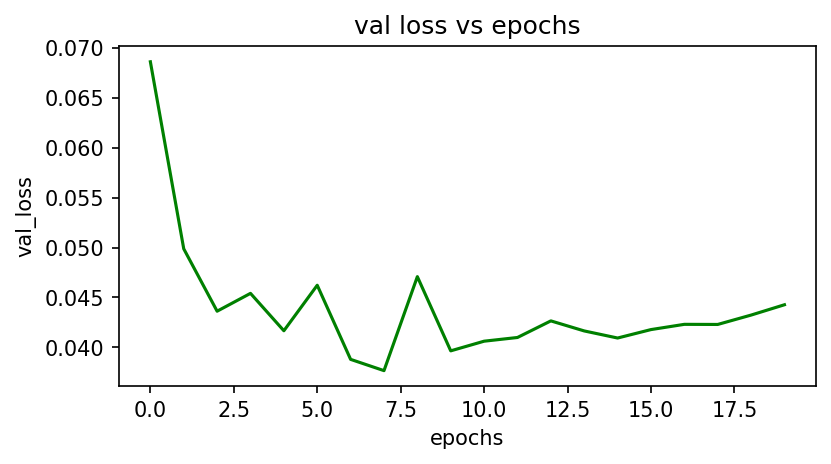

In [13]:
# graph of loss function 


plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history.history['val_loss'],'g')
plt.xlabel("epochs")
plt.ylabel("val_loss")
plt.title("val loss vs epochs")
plt.show()

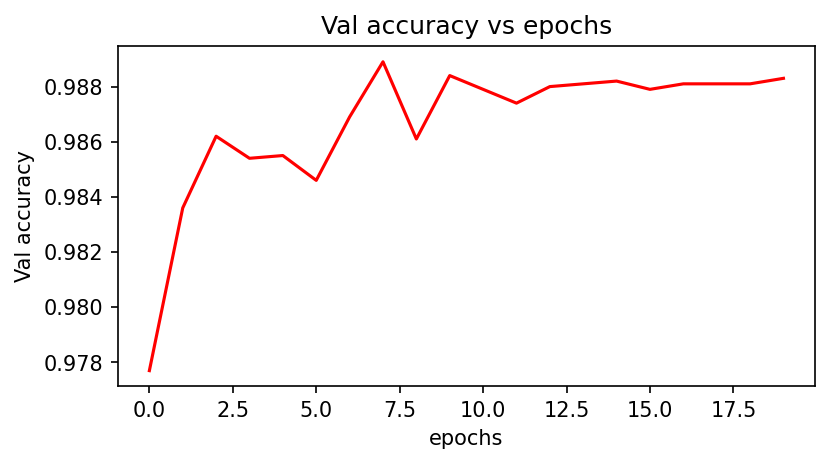

In [14]:
# graph of accuracy score

plt.figure(figsize=(6, 3), dpi=150)
plt.plot(history.history['val_accuracy'],'r')
plt.xlabel("epochs")
plt.ylabel("Val accuracy")
plt.title("Val accuracy vs epochs")
plt.show()

In [15]:
## to save model

model.save("model.h5")

In [16]:
predicted_result=model.predict(testX)

In [17]:
## create confusion metrix

confusion = confusion_matrix(np.argmax(testY, axis=1), np.argmax(predicted_result,axis=1))
confusion

array([[ 975,    1,    1,    0,    0,    1,    1,    1,    0,    0],
       [   0, 1130,    0,    1,    0,    0,    2,    1,    1,    0],
       [   1,    3, 1015,    0,    1,    0,    1,    6,    5,    0],
       [   0,    0,    3, 1003,    0,    1,    0,    1,    2,    0],
       [   0,    0,    1,    0,  976,    0,    1,    0,    0,    4],
       [   1,    0,    0,    5,    0,  884,    2,    0,    0,    0],
       [   6,    3,    1,    0,    1,    1,  945,    0,    1,    0],
       [   1,    1,    6,    1,    1,    0,    0, 1016,    1,    1],
       [   4,    0,    2,    2,    0,    2,    0,    3,  957,    4],
       [   2,    2,    0,    3,   10,    3,    0,    5,    2,  982]])

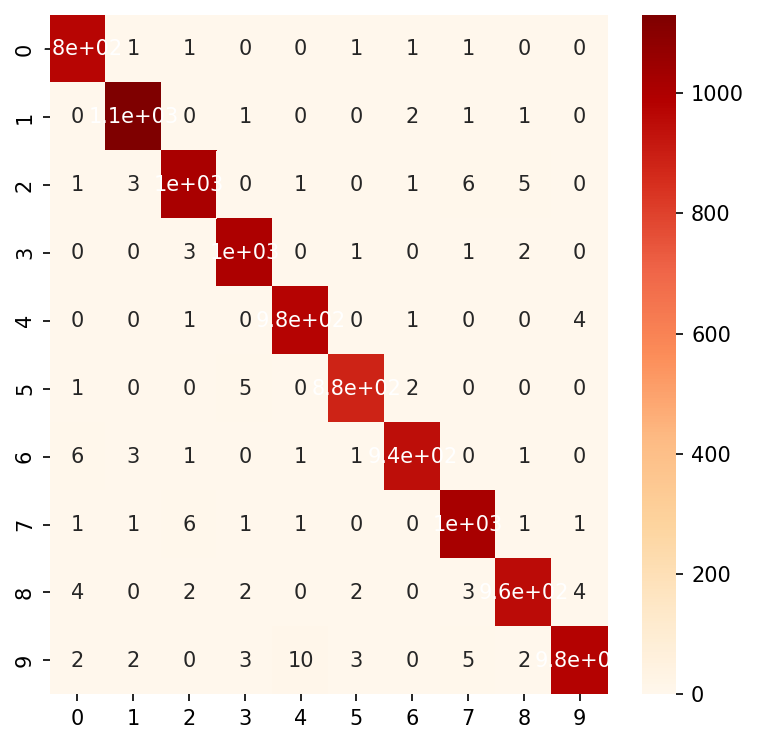

In [18]:
## graphical representation of Confusion matrix

plt.figure(figsize=(6, 6), dpi=150)
sns.heatmap(confusion, annot=True, cmap="OrRd")

In [19]:
## precision score

precision = precision_score(np.argmax(testY, axis=1), np.argmax(predicted_result, axis=1), average='weighted')
print('Precision: %f' % precision)

Precision: 0.988312


In [20]:
## recall score

recall = recall_score(np.argmax(testY, axis=1), np.argmax(predicted_result, axis=1), average='weighted')
print('recall: %f' % recall)

recall: 0.988300


In [21]:
## f1 score

f1 = f1_score(np.argmax(testY, axis=1), np.argmax(predicted_result, axis=1), average= 'weighted')
print('F1 score: %f' % f1)

F1 score: 0.988291


In [22]:
# kappa


kappa = cohen_kappa_score(np.argmax(testY, axis=1), np.argmax(predicted_result, axis=1))
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.986995


In [23]:
# ROC AUC


auc = roc_auc_score(testY, predicted_result)
print('ROC AUC: %f' % auc)

ROC AUC: 0.999921


In [24]:
## output dataframe

output = {
    "accuracy": acc,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Cohens Kappa": kappa,
    "AUC" : auc
}

output_  = pd.Series(output,index=output.keys())

---

## Result

In [25]:
output_

accuracy        0.988300
Precision       0.988312
Recall          0.988300
F1 Score        0.988291
Cohens Kappa    0.986995
AUC             0.999921
dtype: float64

---

## THE END